## __Twitter Sentiment Analysis:__

## Problem Statement: 
To understand the sentiment of a tweeter. Here we are going to train and develop a simple Twitter Sentiment Analysis supervised learning model using python and NLP libraries. This model will be able to detect the sentiment behind the given tweet.

## Dataset: 
The data set contains a set of tweets which are labeled along with the sentiments. And this data we are going to user for training the model. Here we need to predict the sentiment for a given tweet.
Here, in label 
* __label “0”: Positive Sentiment__ 
* __label “1”: Negative Sentiment__  

## How are we going to predict whether a tweet is positive or negative based on the tweet?
- Just like a child, we are going to train the model to differentiate between positive and negative words.
- Here we'll train our model to know the difference between positive and negative context.
- We will feed our model the set of positive and negative tweets. 
- Based on these tweets it will analyze that the combination of which words cause the senetence to be positive or negative.
- And that's how it will train.
- Application : Like in politics, the part can analyze how may people tweeted positively about which politician and to whom should they select to lead the campaign.

## <b>Step 1 </b>: Import all the required libraries 

* __nltk__ : Natural Language Tool Kit is a natural language processing library that contains packages to make machines understand human language and reply to it with an appropriate response.
* __Pandas__ : For analysis and manipulation of data 
* __Sklearn__ : To easily handle machine learning operations
* __Pickle__ : It is an object serializer and we are using it to save our model.
* __Seaborn__ : For statistical data visualization.
* __re__ : To use regular expressions

In [1]:
import pandas as pd
import pickle
import sklearn
import nltk
import re
import seaborn
import warnings  # To ignore warnings
warnings.filterwarnings('ignore')

## Step 2: Import datasets

Read the data with pandas.
* __twitter_data.csv__ : It contains tweets with its corresponding sentiment. We'll use this to train as well as test our model to predict the sentiment behind the tweet.

In [4]:
try:
    data  = pd.read_csv("Data/twitter_data.csv")
except FileNotFoundError:
    print("File does not exist!")

## __Data Exploration__:
- To build a model, it is very important for us to understand the data we are dealing with.
- We'll need to know what is going to be feature and label to train our model.
- __Feature :__ Feature is nothing but the input we are going to provide.
- __Label :__ Label is what we want as an output.
- For our problem, feature is an image and label is the age.
- For this let's see what do we have in the data

In [5]:
print("First 5 observations from the data : ")
print(data.head())

First 5 observations from the data : 
   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


- To see how much data we have i.e., number of rows AKA observations and number of columns.

In [6]:
print("The shape of the data in matrix form : ", data.shape)

The shape of the data in matrix form :  (31962, 3)


Here, 31962 is the number of observations data set, and 3 is the number of columns in the data set.

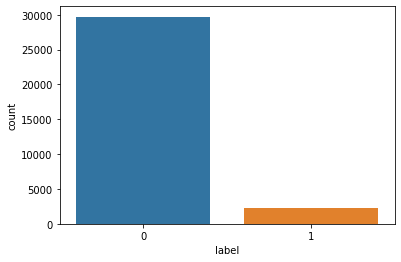

In [7]:
seaborn.countplot(data.label)

### Hashtags
The graph shows normal tweets. Check the top 20 most used hashtags and plot them according to their frequency.
- Following is the graphical representation for the most occurred hashtags in data with positive sentiment.
- __Hashtag__ : A word or phrase preceded by a hash sign (#), used on social media websites and applications, especially Twitter, to identify messages on a specific topic.

In [8]:
#Select all words from normal tweet
normal_words = ' '.join([word for word in data['tweet'][data['label'] == 0]])
#Collect all hashtags
pos_htag = [htag for htag in normal_words.split() if htag.startswith('#')]
#Remove hashtag symbol (#)
pos_htag = [pos_htag[i][1:] for i in range(len(pos_htag))]
#Count frequency of each word
pos_htag_freqcount = nltk.FreqDist(pos_htag)
pos_htag_df = pd.DataFrame({'Hashtag' : list(pos_htag_freqcount.keys()),
                            'Count' : list(pos_htag_freqcount.values())})

[Text(0, 0.5, 'Count')]

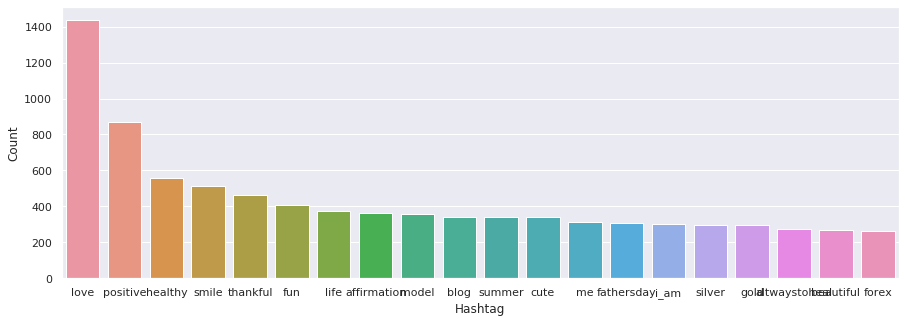

In [9]:
#Select top 20 most frequent hashtags and plot them 
most_frequent = pos_htag_df.nlargest(columns="Count", n = 20) 
seaborn.set(rc={'figure.figsize':(15,5)})
ax = seaborn.barplot( data=most_frequent, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')

The graph shows negative tweets. In negative tweets, 20 hashtags that appeared the most are shown in graph.
- Following is the graphical representation for the most occurred hashtags in data with negative sentiment.




In [10]:
#Repeat same steps for negative tweets
negative_words = ' '.join([word for word in data['tweet'][data['label'] == 1]])
neg_htag = [htag for htag in negative_words.split() if htag.startswith('#')]
neg_htag = [neg_htag[i][1:] for i in range(len(neg_htag))]
neg_htag_freqcount = nltk.FreqDist(neg_htag)
neg_htag_df = pd.DataFrame({'Hashtag' : list(neg_htag_freqcount.keys()),
                            'Count' : list(neg_htag_freqcount.values())})

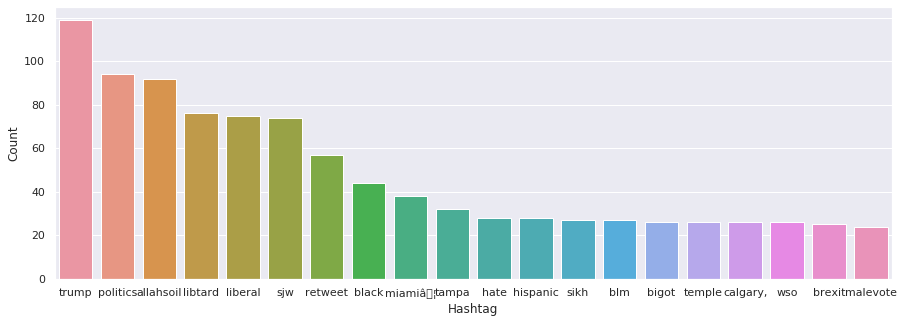

In [11]:
most_frequent = neg_htag_df.nlargest(columns="Count", n = 20) 
seaborn.set(rc={'figure.figsize':(15,5)})
ax = seaborn.barplot(data=most_frequent, x= "Hashtag", y = "Count")


- From both plots, we can conclude that hashtags are very important for sentiment analysis and should not be ignored.
- Words used like love, friend, happy are used in positive tweets whereas negative can be found in words like trump, black, politics, etc.

## Step 3 : Data cleaning and Preprocessing

- In data cleaning, we remove the unwanted contents from data so that we can get better results. 
- Here we are going perform three things,
    - Tokenization: First, we'll split each sentence into words
    - Remove Stop Words: Then we'll remove stop words and any special characters
    - Lemmatization: After this, we'll convert these words into their root form.

### __Tokenization and removing stopwords:__

#### __Tokenizing__ : 
- This breaks up the strings into a list of words or pieces based on a specified pattern using Regular Expressions aka RegEx. 
- eg : white brown fox = ‘white’, ‘brown’, ’fox’

#### __Stop Words__ : 
- In NLP, words like in, the, a, an, etc referred to as stop words.


In [12]:
def tokenization(data):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    stop_words.remove('no')
    stop_words.remove('not')
    
    tokenizer = nltk.tokenize.TweetTokenizer()
    
    document = []
    for text in data:
        collection = []
        tokens = tokenizer.tokenize(text) 
        for token in tokens:
            if token not in stop_words:
                if '#' in token:
                    collection.append(token)
                else:
                    collection.append(re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", " ", token))
        document.append(" ".join(collection))     
    return document
                

In [13]:
tokenized_tweets = tokenization(data.tweet.values)

In [14]:
cleaned_data = pd.DataFrame({'original_tweet':data.tweet, 'Tokenized Tweets': tokenized_tweets})
cleaned_data.to_csv('CSVs/01_tokenization.csv')

#### __Lemmatizing__ : 
- Lemmatizing is the process of converting a word into its root form.
- e.g., "Playing", "Played" = "play".


- Here we are converting each word in its root form. Some times we want our program to recognize that the words “register” and “registration” are just different tenses of the same verb, like for example, we have two questions "How do I register for BridgeLabz?" and "What is the registration processing for BridgeLabz?". Here we want our program to know that registration and register are the same so their answers are also the same, and that's the reason why we lemmatize.


In [15]:
def lemmatization(data):
    lemma_function = nltk.stem.wordnet.WordNetLemmatizer()
    sentence = []
    for text in data:
        document = []
        words = text.split(' ')
        for word in words:
            document.append(lemma_function.lemmatize(word))
        sentence.append(" ".join(document))
    return sentence

In [16]:
lemmatized_tweets = lemmatization(tokenized_tweets)

In [17]:
cleaned_data['cleaned_tweet'] = lemmatized_tweets
cleaned_data.to_csv('CSVs/02_Lemmatization.csv')

- Add the cleaned data to the data frame.

In [18]:
data['cleaned_tweet'] = lemmatized_tweets

In [19]:
print("Original tweet : \n {}  ".format(data['tweet'].iloc[6]))
print('='*90)
print("Tokenized tweet ::\n  {} ".format(tokenized_tweets[6]))
print('='*90)
print("Lemmatized tweet ::\n  {} ".format(lemmatized_tweets[6]))


Original tweet : 
  @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦  
Tokenized tweet ::
    camping tomorrow               danny      
Lemmatized tweet ::
    camping tomorrow               danny      


## Step 4: Split data into train and test datasets
- Now our data is ready to feed to the program. But here we'll split the data into train and test dataset so that after training the model we can test the model on the test dataset and find out how accurate our model is.
* Here we are spliting the data so that the training dataset contains 80% of the data and test dataset contains 20% of the total data.
* __test_size__ : Here we specify the size we want for our test dataset.
* __random_state__ : When we use a random number generator for number or sequence generation, we give a  starting number (AKA seed). When we provide the same seed, every time it’ll generate the same sequence as the first one. That’s why to keep the same random values every time, we give seed as random_state in train_test_split(). 

In [20]:
train_set, test_set, train_labels, test_labels = sklearn.model_selection.train_test_split(data['cleaned_tweet'], 
                                                                                                    data['label'], 
                                                                                                    random_state = 2,
                                                                                                    test_size = 0.2)

After splitting, the size of the train and test data sets are:

In [21]:
print("Shape for train set is : {} ".format(train_set.shape))
print("Shape for test set is : {} ".format(test_set.shape))
print("Shape for train label is : {} ".format(train_labels.shape))
print("Shape for test label is : {} ".format(test_labels.shape))

Shape for train set is : (25569,) 
Shape for test set is : (6393,) 
Shape for train label is : (25569,) 
Shape for test label is : (6393,) 


In [22]:
train_df = pd.DataFrame({"Train_set":train_set, "Train_labels": train_labels})
test_df = pd.DataFrame({"Test_set":test_set, "Test_labels": test_labels})
train_df.to_csv('CSVs/03.1_training_data.csv')
test_df.to_csv('CSVs/03.2_testing_data.csv')

## Step 5 : Model Creation

## Applying Bag-of-Words

 - Bag of words is nothing but a collection of all the unique words along with its number of occurrences in our dataset. It is AKA Corpus.
 - As the machine can't understand text data, we need to convert it in numeric form. So we count the occurrence of each word and save it. This is our bag of words.

# __CountVectorizer__
Counting word occurrence. The reason behind using this approach is that keyword or important signal will occur again and again. So if the number of occurrences represents the importance of the word. More frequency means more importance.

In [23]:
cv = sklearn.feature_extraction.text.CountVectorizer()
cv.fit(train_set)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [24]:
print('Total Features =', len(cv.get_feature_names()))

Total Features = 33681


This is the dictionary created for our dataset.

In [25]:
pd.DataFrame([cv.vocabulary_]).T.to_csv('CSVs/04_Vocabulary.csv')

In [26]:
test_features_vectorized = cv.transform(test_set)
test_features_vectorized

<6393x33681 sparse matrix of type '<class 'numpy.int64'>'
	with 43011 stored elements in Compressed Sparse Row format>

In [27]:
train_features_vectorized = cv.transform(train_set)
train_features_vectorized

<25569x33681 sparse matrix of type '<class 'numpy.int64'>'
	with 194030 stored elements in Compressed Sparse Row format>

- Here we are going to apply the algorithms on our data

## __Logistic Regression__


- Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. 
- In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.).
- It is a predictive analysis algorithm and based on the concept of probability.
- Logistic regression transforms its output using the logistic sigmoid function to return a probability value.
- We use sigmoid function as it always returns a value between 0 and 1.
- Hence, in order to map predicted values to probabilities, we use the sigmoid function. 
- The function maps any real value into another value between 0 and 1. 
- In machine learning, we use sigmoid to map predictions to probabilities.
<img src="images/sigmoid_function.png" alt="Drawing" style="width: 400px;"/>


- s(z) = output between 0 and 1 (probability estimate)
- z = input to the function (your algorithm’s prediction e.g. mx + b)
- e = base of natural log

__Decision Boundary:__
- To predict which class a data belongs, a threshold can be set. Based upon this threshold, the classes are divided
- In above figure, we can see that the decision boundery is set as 0.5, which means if the value of our sigmod function for any observation is below 0.5, we'll consider it as 0 and if greater than or equal to 0.5, we'll consider it as 1. 

<img src="images/decidion_boundary.gif" alt="Drawing" style="width: 600px;"/>


- This fits perfectly when we have 2 categorical variables, but what if we have multiple categorical variables?
- In this case we'll go for Multivariate Logistic Regression
- Multivariate Logistic Regression is based on conditional probability.

<img src="images/Multivariate_Logistic_Regression.png" alt="Drawing" style="width: 600px;"/>

- In the above Multi Class classification example, there are 3 classes. 
- Hence, we need to train 3 different logistic regression classifiers.
    - When training the classifier for Class 1, we will treat input data with class 1 labels as +ve samples (y==1) and all other classes as -ve samples (y==0).
    - When training the classifier for Class 2, we will treat input data with class 2 labels as +ve samples (y==1) and all other classes as -ve samples (y==0).
    - This will continue for all the classes.

__Now let's train our model__
### __Model Creation:__

In [28]:
logistic_model_cv = sklearn.linear_model.LogisticRegression()
logistic_model_cv.fit(train_features_vectorized, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### __Model Testing:__
- Predict using our model

__Prediction phase: One vs all prediction__
- Once training all our classifiers, we can now use it to predict which class the test data belongs to.
- For the test input, we should check the “probability” that it belongs to each class using the trained logistic regression. 
- Your one-vs-all prediction function will pick the class for which the corresponding logistic regression outputs the highest probability and return the class label (1, 2,..., or N) as the prediction for the input example.


In [29]:
pred = logistic_model_cv.predict(test_features_vectorized)

In [30]:
print('Accuracy_score :', sklearn.metrics.accuracy_score(test_labels, pred))

Accuracy_score : 0.9568277803847959


- ### Confusion matrix:
Now, up to here we have done data cleaning, pre-processing, feed it to the algorithm, got our outputs with 96% accuracy, but what about effectiveness of our model. Better the effectiveness, better the performance and that are exactly what we want. So to check the effectiveness of our model we need to check all the predictions and compare them. Here confusing matrix comes in the picture. Confusion Matrix is a performance measurement for machine learning classification. 

In [31]:
sklearn.metrics.confusion_matrix(test_labels, pred)

array([[5887,   30],
       [ 246,  230]])

In [32]:
f1_score_logistic_cv = sklearn.metrics.f1_score(test_labels, pred)
print('F1 :', f1_score_logistic_cv)

F1 : 0.625


In [33]:
sklearn.metrics.confusion_matrix(test_labels, pred)

array([[5887,   30],
       [ 246,  230]])

- ### Save model for Logistic regression:

In [34]:
with open('model/count_vectorizer/logistic_model.pkl', 'wb') as file:
    pickle.dump(cv, file)
    pickle.dump(logistic_model_cv, file)

# __Summary:__ 

Here, we have trained the model to understand the sentiment of a tweeter using Logistic regressionand got f1 score as 0.625 and after this we have saved the trained model into pickle file.